In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

## Ex 1

In [107]:
def f1(x, y):
    return 40.5 * x ** 2 - 18 * x * y + 7 * x + 26.5 * y ** 2

In [139]:
# Functii din laboratorul 7

def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 50 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-4, 6, size) # Axa x1
    x2 = np.linspace(-6, 4, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 10) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()

<br>
<br>

## Aducem functia in forma $$\quad f(x) = \frac{1}{2}x^T A x - b x$$

<br>

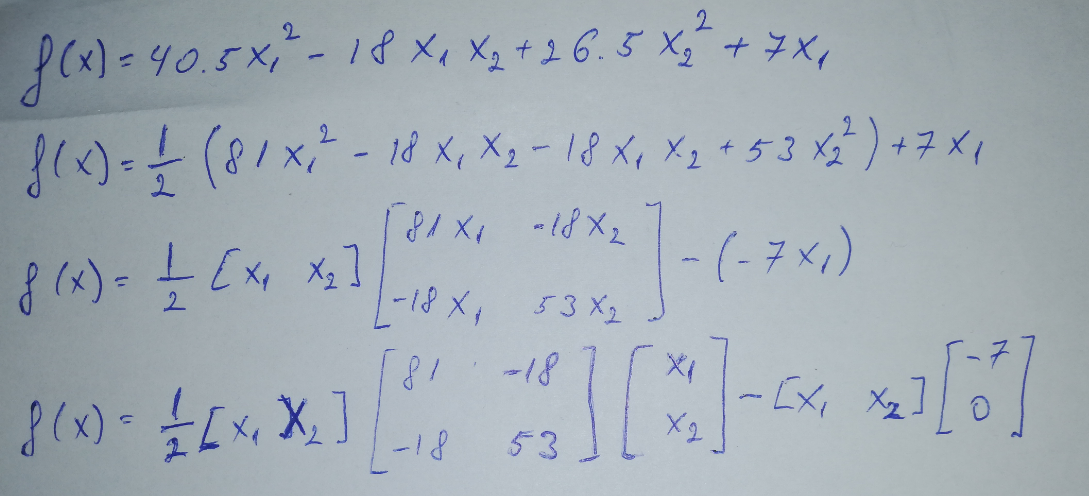

<IPython.core.display.Javascript object>


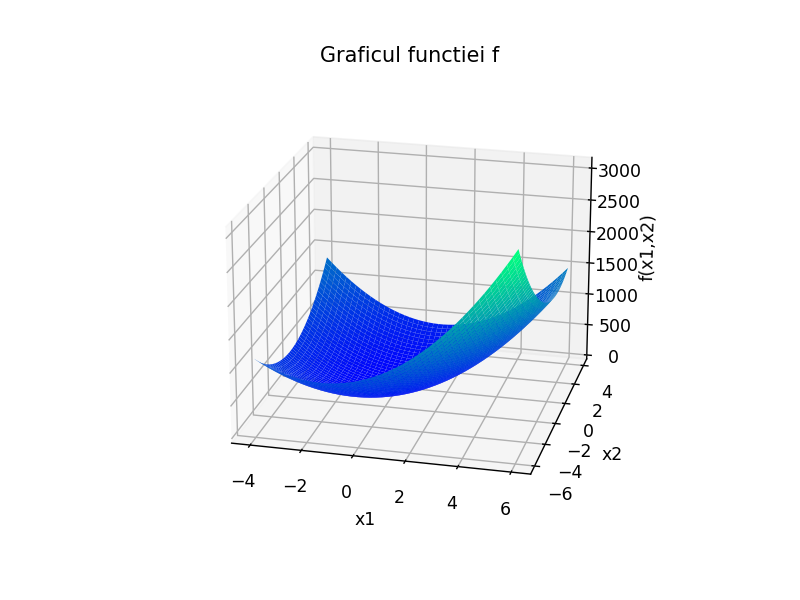

<IPython.core.display.Javascript object>


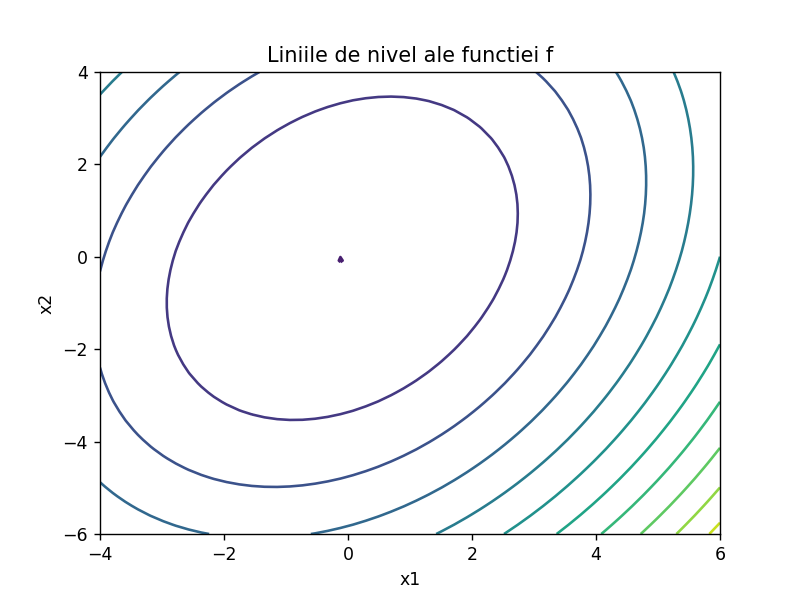

In [144]:
# De unde rezulta urmatoarele valori pentru A si b:
A = np.array([[81, -18],[-18, 53]]).astype(float)
b = np.array([[-7],[0]]).astype(float)

# Vizualizare
grafic_f(A,b)
linii_nivel(A,b)

In [283]:
def determinanti_pozitivi(A):
    if A.shape == (1,1):
        return A[0][0] >= 0
    return e_pozitiv_definita(A[:-1,:-1]) and np.linalg.det(A) >= 0

### 1. Metoda pasului descendent

Calculam ∇f =
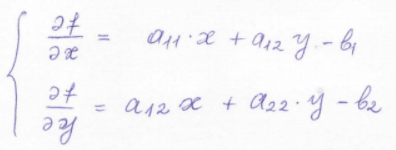

---

si actualizam ecuatia astfel:
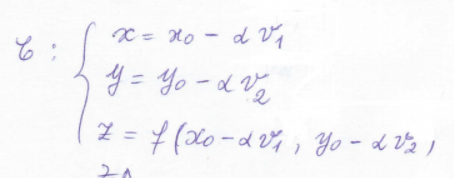

unde alpha este "learning rate-ul".

<IPython.core.display.Javascript object>


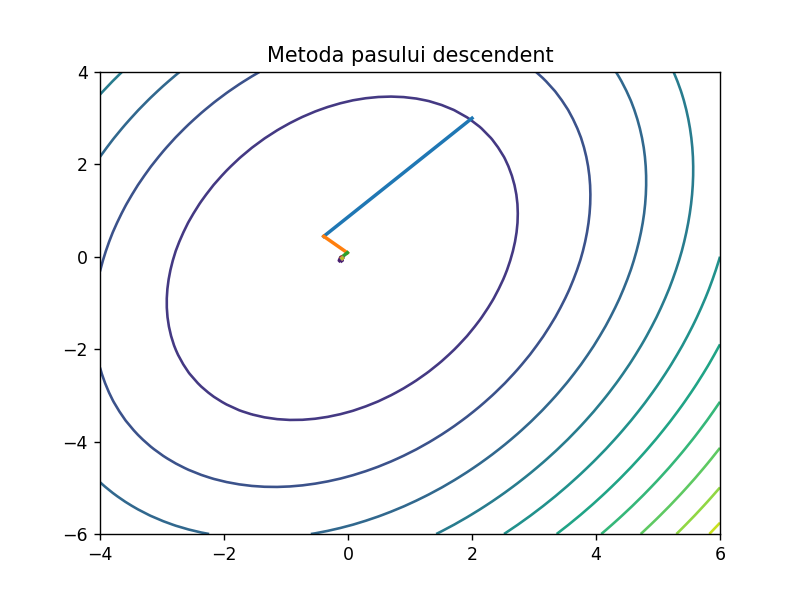

raspuns: [-0.09347443 -0.03174603], in 18 pasi.


In [285]:
MAX_N = 100

if determinanti_pozitivi(A) and (A == A.T).all():  # verificam prin criteriul lui Sylvester
    # folosim algoritmul din curs
    k = 0
    x = np.array([[2], [3]], dtype="float")  # x0 ales arbitrar
    r = (A @ x) - b  # r = ∇f (derivatele partiale)
    xuri = [x]
    
    while np.linalg.norm(r) > 1e-10 and k <= MAX_N:
        alpha = (r.T @ r) / (r.T @ A @ r)  # "learning rate"
        x = x - (alpha * r)
        r = (A @ x) - b
        k += 1  # in loc sa retin toate r-urile, le rescriu. k e doar pentru conditia de oprire
        
        xuri.append(x)  # pentru vizualizarea valorilor luate

    
    xuri = np.array(xuri)
    
    (X1, X2, X3) = grid_discret(A, b)
    plt.figure()
    plt.contour(X1, X2, X3, levels = 10)
    
    for i in range(len(xuri) - 1):
        plt.plot([xuri[i,0], xuri[i+1,0]], [xuri[i,1], xuri[i+1,1]], linestyle='-', linewidth=2)
        
    print(f'raspuns: {x.reshape(-1)}, in {k} pasi.')
    
    plt.title('Metoda pasului descendent')
    plt.show()
else:
    print('Matricea trebuie sa fie pozitiv definita si simetrica')

### 2. Metoda gradientilor conjugati
#### Am folosit algoritmul de pe Wikipedia https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm

<IPython.core.display.Javascript object>


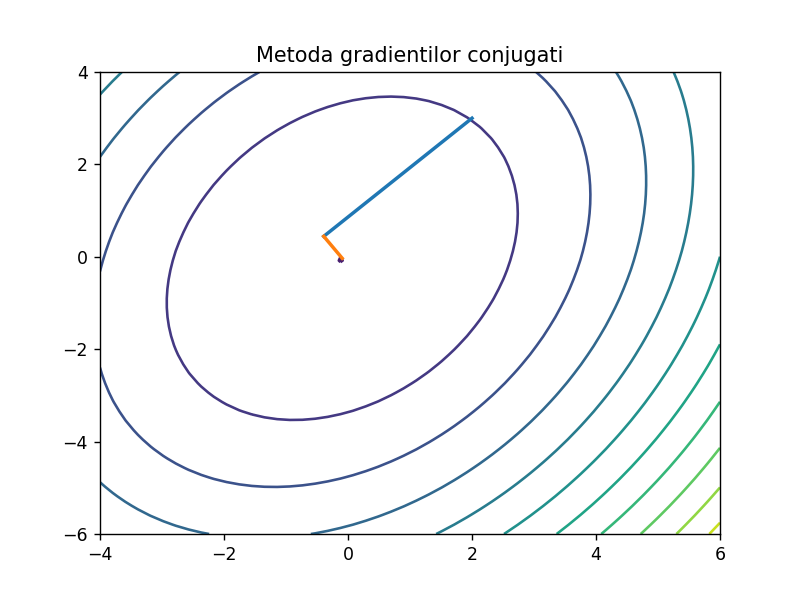

raspuns: [-0.09347443 -0.03174603], in 2 pasi.


In [286]:
MAX_N = 100

if e_pozitiv_definita(A) and (A == A.T).all():  # verificam prin criteriul lui Sylvester
    k = 0
    x = np.array([[2], [3]], dtype="float")  # x0 ales arbitrar
    r = b - (A @ x)  # r = ∇f (derivatele partiale)
    p = r.copy()
    xuri = [x]
    
    while np.linalg.norm(r) > 1e-10 and k <= MAX_N:
        alpha = (r.T @ r) / (p.T @ A @ p)  # "learning rate"
        x = x + (alpha * p)
        r_nou = r - (alpha * (A @ p))
            
        beta = (r_nou.T @ r_nou) / (r.T @ r)
        r = r_nou
        p = r + (beta * p)
        
        k += 1
        xuri.append(x)  # pentru vizualizarea valorilor luate
    
    xuri = np.array(xuri)
    
    (X1, X2, X3) = grid_discret(A, b)
    plt.figure()
    plt.contour(X1, X2, X3, levels = 10)
    
    for i in range(len(xuri) - 1):
        plt.plot([xuri[i,0], xuri[i+1,0]], [xuri[i,1], xuri[i+1,1]], linestyle='-', linewidth=2)
        
    print(f'raspuns: {x.reshape(-1)}, in {k} pasi.')
    
    plt.title('Metoda gradientilor conjugati')
    plt.show()
else:
    print('Matricea trebuie sa fie pozitiv definita si simetrica')

#### Se observa ca metoda gradientilor conjugati este mult mai eficienta (nr de iteratii = n).

### Ex 2

In [73]:
def f2(x):
    return np.sin((-5) * x) - np.cos(2 * x) + 0.53 * x

def P(x, X, C, n):
    return C[0] + np.sum([C[i] * np.prod([x - X[j] for j in range(i)]) for i in range(1, n)])

Folosim algoritmul din curs

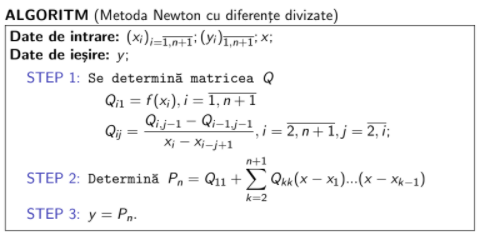

Spre deosebire de curs, am folosit indexarea de la 0.

In [290]:
nr = 100

def newton(f, st, dr, optiune=1):  # optiune = nr exercitiuliui (afisare functie / erori)
    x_gr = np.linspace(st, dr, nr)
    y_gr = f(x_gr)
    
    plt.figure()
    if optiune == 1:
        plt.plot(x_gr, y_gr, label='f(x)')
        
    N = 0
    erori = []
    while True:  # pornim cu N = 1 si il crestem pana cand eroarea < 1e-5
        N += 1
        X = np.linspace(st, dr, N + 1)
        y = f(X)
        
        Q = np.zeros((N+1, N+1), dtype='float')
        Q[:,0] = f(X)
        for j in range(1, N+1):
            for i in range(j, N+1):
                Q[i,j] = (Q[i,j-1] - Q[i-1,j-1]) / (X[i] - X[i-j])
        
        C = np.array([Q[i,i] for i in range(N+1)])
        
        y_p = [P(x_, X, C, N+1) for x_ in x_gr]
        
        eroare_max = np.max(np.abs(y_p - y_gr))
        erori.append((N+1, eroare_max))
        
        if eroare_max <= 1e-5:
            break

    if optiune == 1:    
        plt.scatter(X, y, color='black')
        plt.plot(x_gr, y_p, color='orange', linestyle='--', label=f'P(x) cu {N+1} puncte')
        print(f'Eroare: {eroare_max}')
        
    elif optiune == 2:
        erori = np.array(erori)
        plt.plot(erori[:,0], erori[:,1], label='Eroarea de trunchiere')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


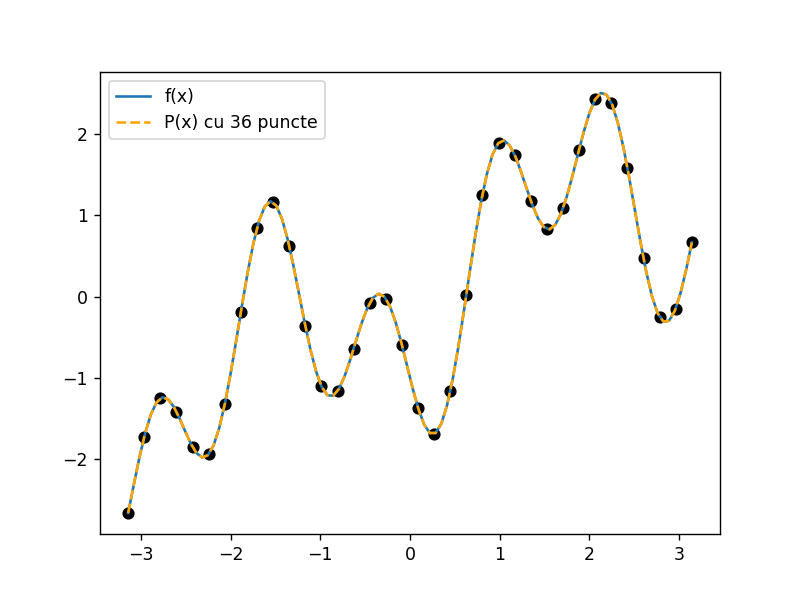

Eroare: 5.045612820442358e-06


In [291]:
newton(f2, -np.pi, np.pi, 1)

<IPython.core.display.Javascript object>


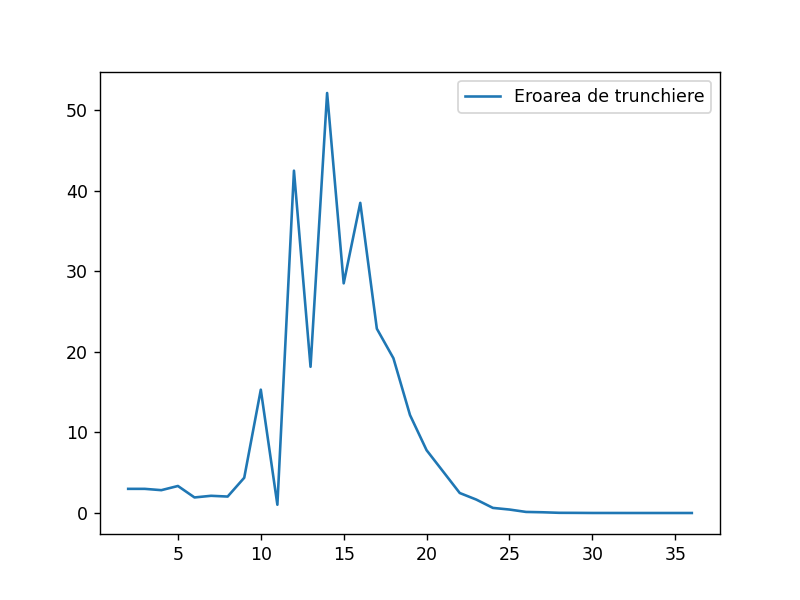

In [105]:
newton(f2, -np.pi, np.pi, 2)

### Ex 3

In [159]:
def f3(x):
    return 5 * np.sin(5 * x) - 8 * np.cos(4 * x) + 25.64 * x

def f3_d(x):  # derivata
    return 25 * np.cos(5 * x) + 32 * np.sin(4 * x) + 25.64

Completam coeficientii astfel:

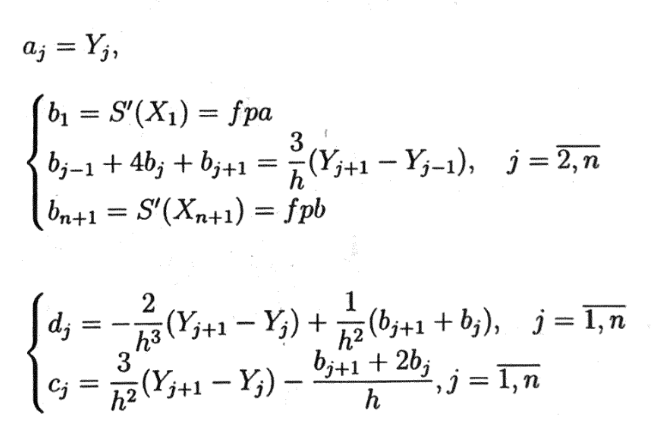

Pentru gasirea coeficientilor b vom rezolva sistemul B_c @ b = B_y.

Din nou, am indexat de la 0.

In [292]:
def spline_cubica(f, f_d, st, dr, optiune=1):
    x_gr = np.linspace(st, dr, nr)
    y_gr = f(x_gr)

    plt.figure()
    if optiune == 1:
        plt.plot(x_gr, y_gr, label='f(x)')

    N = 1
    erori = []
    while True:
        N += 1
        X = np.linspace(st, dr, N+1)
        y = f(X)

        h = X[1] - X[0]
        a = y
        
        B_c = np.zeros((N+1,N+1))  # coeficientii sistemului
        B_c[0,0] = 1
        B_c[N,N] = 1
        for i in range(1,N):  # construim matricea asociata lui B
            B_c[i,i-1] = 1
            B_c[i,i] = 4
            B_c[i,i+1] = 1
        
        B_y = [f_d(X[0])] + [ 3 / h * (y[j+1] - y[j-1]) for j in range(1, N)] + [f_d(X[N])]  # raspunsurile sistemului
        B_y = np.array(B_y)
        
        b =  np.linalg.solve(B_c, B_y)
            
        c = np.array([ (3 / (h ** 2)) * (y[j+1] - y[j]) - ((b[j-1] + 2 * b[j]) / h) for j in range(N)])
        
        d = np.array([ (-2 / (h ** 3)) * (y[j+1] - y[j]) + ((b[j-1] + b[j]) / h ** 2) for j in range(N)])

        
        def functie_spline(i):
            return lambda t: a[i] + b[i] * (t - X[i]) + c[i] * (t - X[i]) ** 2 + d[i] * (t - X[i]) ** 3

        
        y_aprox = np.piecewise(
            x_gr,
            [
                (X[i] <= x_gr) & (x_gr < X[i + 1])  # pentru fiecare segment folosim functia asociata
                for i in range(N - 1)
            ],
            [
                functie_spline(i)
                for i in range(N)
            ]
        )
        
        eroare_max = np.max(np.abs(y_aprox - y_gr))
        erori.append((N+1, eroare_max))
        
        if eroare_max <= 1e-5:  # exact la 100 de puncte sare de la 0.31455236 la 0
            break

    if optiune == 1:    
        plt.scatter(X, y, color='black')
        plt.plot(x_gr, y_aprox, color='orange', linestyle='--', label=f'aproximare cu {N+1} puncte')
        print(f'Eroare: {eroare_max}')
        
    elif optiune == 2:
        erori = np.array(erori)
        plt.plot(erori[:,0], erori[:,1], label='Eroarea de trunchiere')
        
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


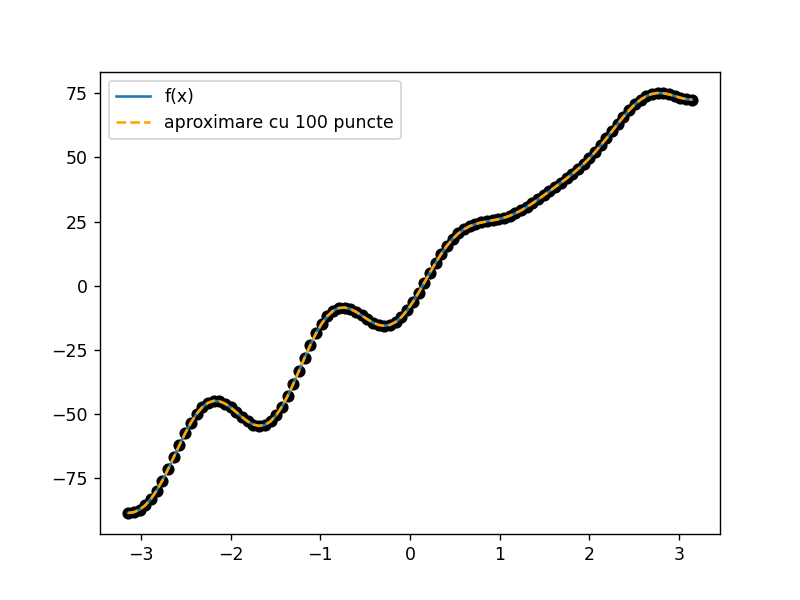

Eroare: 0.0


In [293]:
spline_cubica(f3, f3_d, -np.pi, np.pi)

<IPython.core.display.Javascript object>


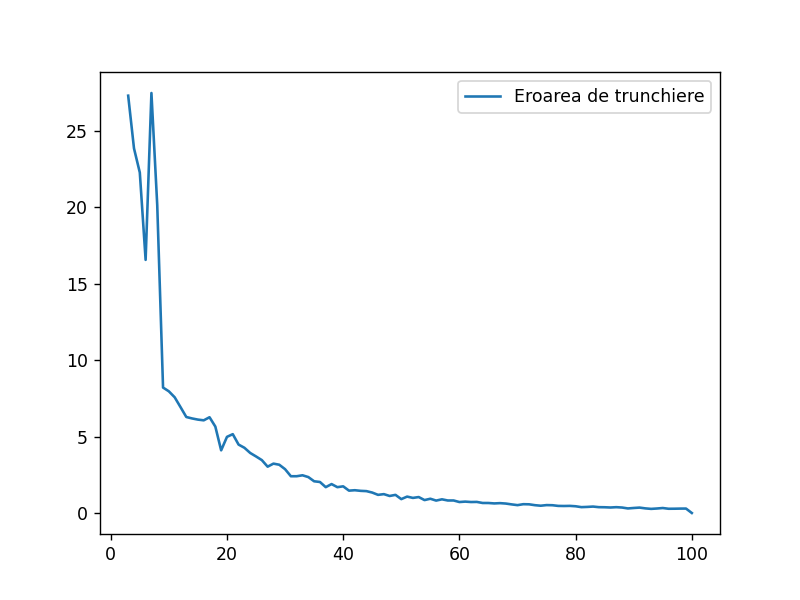

In [289]:
spline_cubica(f3, f3_d, -np.pi, np.pi, 2)

### Am incercat si varianta cu polinomul Lagrange si ajunge mai repede la rezultat.

<IPython.core.display.Javascript object>


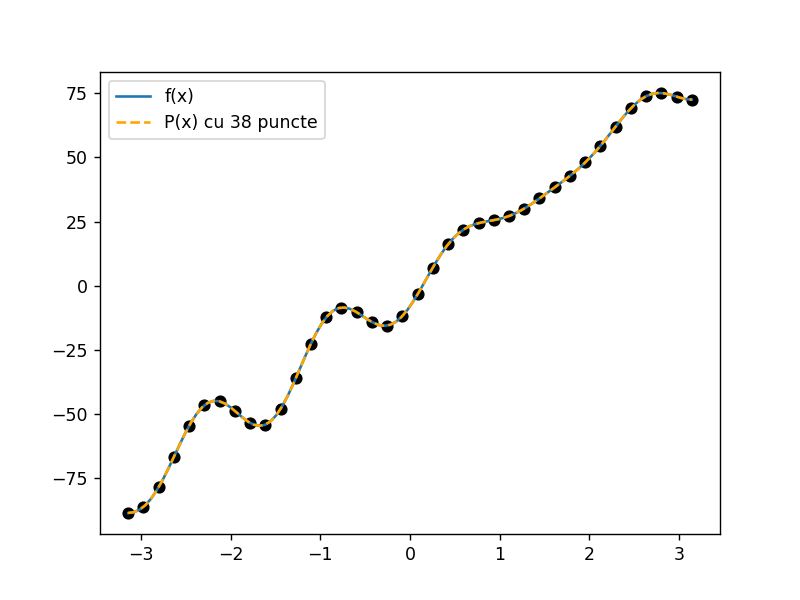

Eroare: 2.1217947505647317e-06


In [294]:
newton(f3, -np.pi, np.pi)